# 切换目录

In [1]:

import os

os.chdir(r'D:\Projects\MachineLearning\textrnn')


# 数据加载

In [2]:
from sklearn import metrics
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, learning_curve

file = pd.read_csv('data.csv')
df = pd.DataFrame(file)
_header = ['underflow', 'overflow', 'callstack', 'tod', 'timestamp', 'reentrancy']
i = _header[4]
X = []
Y = []
for x, y in zip(df.iloc[:, df.columns == 'opcode']['opcode'], df.iloc[:, df.columns == i][i]):
    X.append(x)
    Y.append(y)
Y = np.array(Y)

# 数据处理


In [3]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2), decode_error="ignore", min_df=1)
X = ngram_vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# 模型训练

In [4]:
model = XGBClassifier(learning_rate=0.2, num_leaves=25, max_depth=12)
model.fit(X_train, y_train)

C:\Users\lhy\miniconda3\envs\federated\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_leaves=25, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# Shap

In [5]:
import shap

# Create the shap explainers
explainer = shap.TreeExplainer(model)
shap_values_train = explainer.shap_values(X_train)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# Shap Summary Plot


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


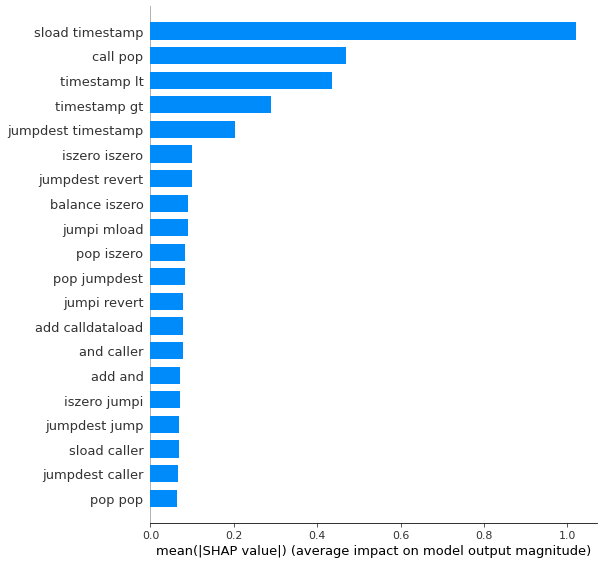

In [10]:
txt_dense_df = pd.DataFrame(X_train.todense(), columns=ngram_vectorizer.get_feature_names())
shap_values_train_df = pd.DataFrame(shap_values_train, columns=txt_dense_df.columns)
shap.summary_plot(shap_values_train_df, txt_dense_df, plot_type="bar")

In [ ]:
txt_dense_df.head(5)
shap_values_train_df.head(5)

# Shap Force Plot

In [ ]:
# All Features
# shap.force_plot(explainer.expected_value, shap_values_train[0], txt_dense_df.iloc[0, :], matplotlib=True)

# 20 features
tmp = shap_values_train[0, :]
tmp = list(tmp)
tmp.sort()
rs = tmp[0:10] + tmp[-11:-1]

t_dict = {}
count = 0
for i in range(len(list(shap_values_train[0, :]))):
    if t_dict.get(list(shap_values_train[0, :])[i]):
        count += 1
        continue
    t_dict.update({list(shap_values_train[0, :])[i]: i})
rs = np.array([rs])
aaaa = {}
for i in rs[0]:
    print(f'feature: {txt_dense_df.iloc[0][txt_dense_df.columns[t_dict[i]]]}, shap: {i}, index: {t_dict[i]}')
    aaaa.update({txt_dense_df.columns[t_dict[i]]: txt_dense_df.iloc[0][txt_dense_df.columns[t_dict[i]]]})

aaaa = pd.DataFrame([aaaa])
shap.initjs()
shap.force_plot(explainer.expected_value, rs[0], aaaa)


In [14]:
a = shap_values_train_df.apply(np.sum, axis=0) != 0
b = list(filter(lambda x: a[x], a.keys()))
print(b)
new = shap_values_train_df.reindex(columns=b)
new.head()

['add add', 'add and', 'add blockhash', 'add calldatacopy', 'add calldataload', 'add calldatasize', 'add caller', 'add callvalue', 'add eq', 'add exp', 'add extcodesize', 'add gas', 'add gt', 'add iszero', 'add jump', 'add jumpdest', 'add log1', 'add log2', 'add log3', 'add lt', 'add mload', 'add mstore', 'add mul', 'add or', 'add pop', 'add return', 'add sha3', 'add sload', 'add sstore', 'add sub', 'add timestamp', 'address and', 'address balance', 'address caller', 'address eq', 'address exp', 'address jump', 'address mload', 'address mul', 'and add', 'and address', 'and and', 'and balance', 'and byte', 'and calldataload', 'and caller', 'and callvalue', 'and div', 'and eq', 'and exp', 'and gt', 'and iszero', 'and jump', 'and jumpdest', 'and log2', 'and log3', 'and lt', 'and mload', 'and mstore', 'and mul', 'and not', 'and or', 'and origin', 'and pop', 'and sload', 'and sstore', 'and sub', 'and timestamp', 'and xor', 'balance and', 'balance callvalue', 'balance gt', 'balance iszero', 

,add add,add and,add blockhash,add calldatacopy,add calldataload,add calldatasize,add caller,add callvalue,add eq,add exp,...,timestamp gt,timestamp jump,timestamp lt,timestamp mload,timestamp mstore,timestamp pop,timestamp sload,timestamp sstore,timestamp sub,xor xor
0,-0.022632,-0.018703,-0.000021,-0.031919,0.040972,-0.004321,-0.000028,-0.000051,-0.000521,0.004501,...,-0.153287,-0.002041,1.125623,-0.000047,-0.000020,-0.004792,-0.019969,-0.011844,-0.007065,-0.000224
1,-0.033253,-0.083741,-0.000044,-0.007991,0.108436,-0.030747,-0.000017,-0.000071,-0.003998,0.005628,...,-0.275404,-0.003773,-0.408920,-0.000012,-0.000043,-0.022717,-0.043238,-0.010034,0.000398,-0.000514
2,-0.065269,-0.020891,-0.000010,0.020902,-0.031932,-0.002772,-0.000223,-0.000540,-0.006347,-0.088786,...,0.440393,-0.001511,0.449126,-0.000199,-0.000009,0.220670,-0.010773,-0.008978,-0.006284,-0.000108
3,0.011480,0.061477,-0.000010,-0.008024,0.018541,-0.004622,-0.000078,-0.000348,-0.000629,0.003268,...,0.576208,-0.000786,0.804636,-0.000115,-0.000009,-0.006198,-0.014802,-0.031403,-0.002386,-0.000108
4,-0.050770,0.043402,-0.000044,-0.022753,-0.164811,-0.010579,-0.000010,-0.000052,-0.000585,-0.042586,...,-0.349611,-0.003429,-0.409096,-0.000007,-0.000043,-0.009623,-0.038050,-0.016004,0.000211,-0.000514
